# PROJECT: H1-B VISA FORECASTING MODEL
H1-B visa is category of employment-based visa which is granted by United States department of immigration for highly skilled foreign workers who wants to work for companies which are in united states .H1-B visa are granted under strict stipulations. Companies in United States apply for this visa for their employees from their respective countries. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.The idea behind our project is to predict the chances of an employee of getting the visa approved after analyzing parameters such as his/her salary, job title, company profile, Company location etc. So, we believe that a predictive model generated using all the past data can be a useful resource to predict the outcome for the applicants and the sponsors

# Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
from math import isnan
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing Data

In [2]:
#Reading the csv file
df=pd.read_csv('/Users/kulbir/Downloads/dataset111.csv',encoding = "ISO-8859-1")
df

,Unnamed: 0,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_STATE,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,TOTAL_WORKERS,VISA_CLASS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_POSTAL_CODE,WORKSITE_STATE
0,0,MINNEAPOLIS,DEBRA SCHNEIDER,MN,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,710 MEDTRONIC PARKWAY NE,MINNEAPOLIS,...,1.0,H-1B,20000 -,NaN,Year,N,EDEN PRAIRIE,STERNS,55412,CA
1,1,NaN,NaN,NaN,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,905 ASP AVE,NORMAN,...,1.0,H-1B,85000.00 -,NaN,Year,N,NORMAN,CLEVELAND,73019,OK
2,2,DALLAS,HASEENA ENU,TX,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,6021 CONNECTION DRIVE,IRVING,...,1.0,H-1B,94000 -,NaN,Year,N,SAN DIEGO,SAN DIEGO,92127,CA
3,3,SCHAUMBURG,ELDON KAKUDA,IL,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,9510 N. HOUSTON ROSSLYN ROAD,HOUSTON,...,2.0,H-1B,66000 - 70000,NaN,Year,N,HOUSTON,HARRIS,77088,TX
4,4,WASHINGTON,JAMES ALEXANDER,DC,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,8250 JONES BRANCH DRIVE,MCLEAN,...,1.0,H-1B,97000 - 143300,NaN,Year,N,MCLEAN,FAIRFAX,22102,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,NaN,",",NaN,I-200-16253-389632,CERTIFIED,2016-09-09,2016-09-15,1305 CHERRINGTON PARKWAY,MOON TOWNSHIP,...,6.0,H-1B,33.53,0,Hour,N,PHILADELPHIA,PHILADELPHIA,19103,PA
1048571,1048571,WEST BLOOMFIELD,"SHERMAN, MICHAEL",MI,I-200-16253-408673,CERTIFIED,2016-09-09,2016-09-15,ONE LA-Z-BOY DRIVE,MONROE,...,1.0,H-1B,"113,500.00",0,Year,N,MONROE,MONROE,48162,MI
1048572,1048572,WASHINGTON,"MUHLENKAMP, PRISCILLA",DC,I-200-16253-507837,CERTIFIED,2016-09-09,2016-09-15,9201 CORPORATE BOULEVARD,ROCKVILLE,...,1.0,H-1B,"63,461.00","94,500.00",Year,N,CHICAGO,COOK,60606,IL
1048573,1048573,RESTON,"GOEL, VIC",VA,I-200-16253-591555,CERTIFIED,2016-09-12,2016-09-16,9201 CORPORATE BOULEVARD,ROCKVILLE,...,1.0,H-1B,"73,320.00","87,000.00",Year,N,REDMOND,KING,98052,WA


In [3]:
# Creating a copy of dataframe df
dp=df.copy()

# DATA EXPLORATION

In [4]:
print('No of rows and columns: ',df.shape)
print('\n Total no of entry in each column: \n', df.count())
print('Types of Data:\n',df.info())

No of rows and columns:  (1048575, 42)

 Total no of entry in each column: 
 Unnamed: 0               1048575
AGENT_ATTORNEY_CITY       656050
AGENT_ATTORNEY_NAME       821449
AGENT_ATTORNEY_STATE      638375
CASE_NUMBER              1048575
CASE_STATUS              1048575
CASE_SUBMITTED           1048575
DECISION_DATE            1048575
EMPLOYER_ADDRESS         1048546
EMPLOYER_CITY            1048541
EMPLOYER_COUNTRY         1048551
EMPLOYER_NAME            1048541
EMPLOYER_PHONE           1048511
EMPLOYER_PHONE_EXT         63312
EMPLOYER_POSTAL_CODE     1048528
EMPLOYER_PROVINCE          14544
EMPLOYER_STATE           1048521
EMPLOYMENT_END_DATE      1048544
EMPLOYMENT_START_DATE    1048547
FULL_TIME_POSITION        618791
H-1B_DEPENDENT           1027946
H1B_DEPENDENT                  0
JOB_TITLE                1048554
NAICS_CODE                     0
NAIC_CODE                1048552
PREVAILING_WAGE          1048507
PW_UNIT_OF_PAY           1048484
PW_WAGE_SOURCE           1048486

In [5]:
df.describe()

,Unnamed: 0,H1B_DEPENDENT,NAICS_CODE,NAIC_CODE,PREVAILING_WAGE,PW_WAGE_SOURCE_YEAR,TOTAL_WORKERS
count,1.048575e+06,0.0,0.0,1.048552e+06,1.048507e+06,1.048478e+06,1.048560e+06
mean,5.242870e+05,NaN,NaN,4.575415e+05,6.951007e+04,2.014623e+03,2.123232e+00
std,3.026977e+05,NaN,NaN,1.862808e+05,3.185997e+04,4.360179e+00,5.279503e+00
min,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.621435e+05,NaN,NaN,5.181120e+05,5.566100e+04,2.014000e+03,1.000000e+00
50%,5.242870e+05,NaN,NaN,5.415110e+05,6.651800e+04,2.015000e+03,1.000000e+00
75%,7.864305e+05,NaN,NaN,5.415110e+05,8.297100e+04,2.015000e+03,1.000000e+00
max,1.048574e+06,NaN,NaN,9.999990e+05,9.110400e+06,2.016000e+03,3.000000e+02


Unnamed: 0                     0
AGENT_ATTORNEY_CITY       392525
AGENT_ATTORNEY_NAME       227126
AGENT_ATTORNEY_STATE      410200
CASE_NUMBER                    0
CASE_STATUS                    0
CASE_SUBMITTED                 0
DECISION_DATE                  0
EMPLOYER_ADDRESS              29
EMPLOYER_CITY                 34
EMPLOYER_COUNTRY              24
EMPLOYER_NAME                 34
EMPLOYER_PHONE                64
EMPLOYER_PHONE_EXT        985263
EMPLOYER_POSTAL_CODE          47
EMPLOYER_PROVINCE        1034031
EMPLOYER_STATE                54
EMPLOYMENT_END_DATE           31
EMPLOYMENT_START_DATE         28
FULL_TIME_POSITION        429784
H-1B_DEPENDENT             20629
H1B_DEPENDENT            1048575
JOB_TITLE                     21
NAICS_CODE               1048575
NAIC_CODE                     23
PREVAILING_WAGE               68
PW_UNIT_OF_PAY                91
PW_WAGE_SOURCE                89
PW_WAGE_SOURCE_OTHER       11972
PW_WAGE_SOURCE_YEAR           97
SOC_CODE  

<AxesSubplot:>

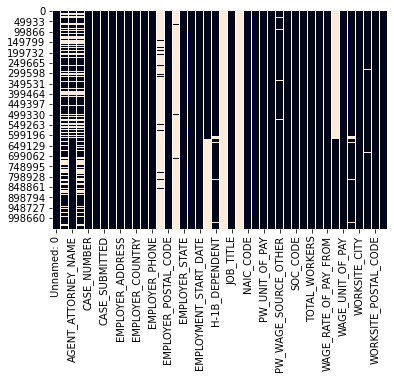

In [6]:
# Analyzing the missing values in the columns of dataframe via heatmap
print(df.isnull().sum())
sns.heatmap(df.isnull(),cbar=False)

# Generating Insights from Data


# 1) H1-B VISA DETAILING CERTIFIED AND DENIED

In [7]:
df.CASE_STATUS.value_counts()

CERTIFIED              928961
CERTIFIED-WITHDRAWN     69751
WITHDRAWN               33948
DENIED                  15915
Name: CASE_STATUS, dtype: int64

In [8]:
case_status = {
   'CASE_STATUS': {
       r'CERTIFIED-WITHDRAWN': 'CERTIFIED'}
}
df.replace(case_status, regex=True, inplace=True)

# drop rows with 'WITHDRAWN' value 
sp = df[df['CASE_STATUS']=='WITHDRAWN'].index
df.drop(sp , inplace=True)

In [9]:
#color=['lightcoral','lightseagreen','goldenrod','cornflowerblue','darkorchid','olivedrab','lightsalmon','forestgreen']
colors=['indigo','purple','firebrick','indianred','peru','orange','goldenrod','gold','khaki','lemonchiffon']

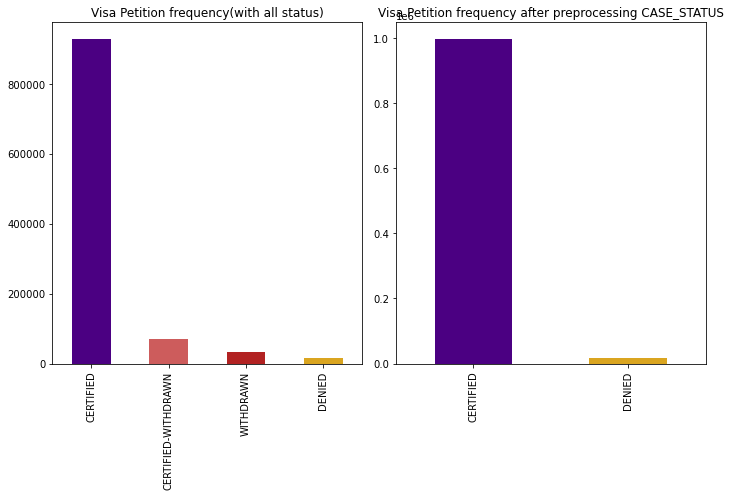

In [10]:
# Plots before and after processing CASE_STATUS Column
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
dp['CASE_STATUS'].value_counts().plot(kind='bar',title='Visa Petition frequency(with all status)', color=['indigo','indianred','firebrick','goldenrod'])
plt.subplot(1, 2, 2)
df['CASE_STATUS'].value_counts().plot(kind='bar',title='Visa Petition frequency after preprocessing CASE_STATUS', color=['indigo','goldenrod'])
plt.tight_layout()
plt.show()

Here we have visuliazed our data set after removing withdrwan visa applicationsas it is not required and replaced certified-withdrawn with certified status 

# 2) Full Time VS Part time

<AxesSubplot:>

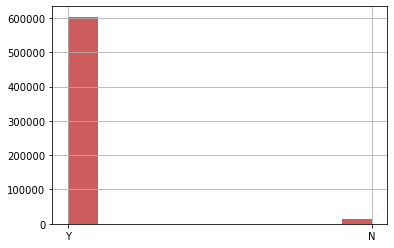

In [11]:
#Full Time VS Part time
dp['FULL_TIME_POSITION'].hist(color='indianred')

From the above graph we can say that Full time positions have applications when compared to part-time positions.

# 3) Prevailing wage vs AVERAGE WAGE

Avg wage of visa denied candidates: 62403.97442664154
Avg wage of visa certified candidates: 69648.97078537155


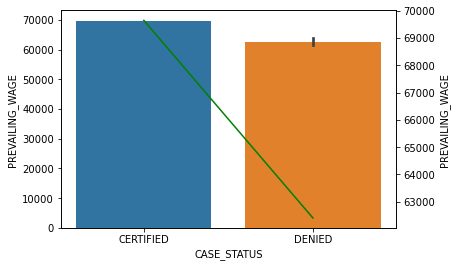

In [12]:
visa_certified = df[(df["CASE_STATUS"]=='CERTIFIED')]
visa_denied=df[(df["CASE_STATUS"]=='DENIED')]
visa_denied_wage = visa_denied['PREVAILING_WAGE']
visa_denied_count = visa_denied['CASE_STATUS'].count()
visa_denied_avg = ((visa_denied_wage.sum())/visa_denied_count)   
#Do people who have been certified the visa in general earn more wage than those whose visa have been denied?
print("Avg wage of visa denied candidates:",  visa_denied_avg)
visa_certified_wage = visa_certified['PREVAILING_WAGE']
visa_certified_count = visa_certified['CASE_STATUS'].count()
visa_certified_avg = ((visa_certified_wage.sum())/visa_certified_count)
print("Avg wage of visa certified candidates:",  visa_certified_avg)

details = {
    'CASE_STATUS' : ['CERTIFIED','DENIED'],
    'PREVAILING_WAGE' : [visa_certified_avg,visa_denied_avg],    
}
T = pd.DataFrame(details)
fig, ax = plt.subplots()
sns.barplot(x='CASE_STATUS', y='PREVAILING_WAGE', data=df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='CASE_STATUS', y='PREVAILING_WAGE', data=T, ax=ax2, color='green')
plt.show()


From the above it is clear that average wage of people who have been certified the visa is greater than the average wage of people who have been denied the visa.We can also interpret that average salary of certified candidates is more tham denied candidates.

# 4) Top 10 occupations hiring h1-B applicants

In [13]:
visa_certified = df[df['CASE_STATUS'] == 'CERTIFIED']
visa_soc = visa_certified['SOC_CODE'].value_counts().head(10).to_frame().reset_index().rename(columns={"index": "SOC_CODE", "SOC_CODE": "COUNT"})
visa_soc['PERCENT'] = round(visa_soc['COUNT'] / len(visa_certified),3)

In [14]:
soc_code_list = visa_soc['SOC_CODE']
visa_soc['SOC_NAME'] = np.nan
for i in range(10):  
    name = df[df['SOC_CODE'] == soc_code_list[i]]['SOC_NAME'].value_counts().reset_index().iloc[0,0]
    visa_soc.iloc[i,3] = name 
visa_soc

,SOC_CODE,COUNT,PERCENT,SOC_NAME
0,15-1121,224241,0.225,COMPUTER SYSTEMS ANALYSTS
1,15-1132,212276,0.213,"SOFTWARE DEVELOPERS, APPLICATIONS"
2,15-1131,166723,0.167,COMPUTER PROGRAMMERS
3,15-1199,52855,0.053,"COMPUTER OCCUPATIONS, ALL OTHER"
4,15-1133,37410,0.037,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE"
5,13-1111,27223,0.027,MANAGEMENT ANALYSTS
6,13-2011,20835,0.021,ACCOUNTANTS AND AUDITORS
7,21-Nov,18520,0.019,COMPUTER AND INFORMATION SYSTEMS MANAGERS
8,13-2051,18257,0.018,FINANCIAL ANALYSTS
9,13-1161,14905,0.015,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...


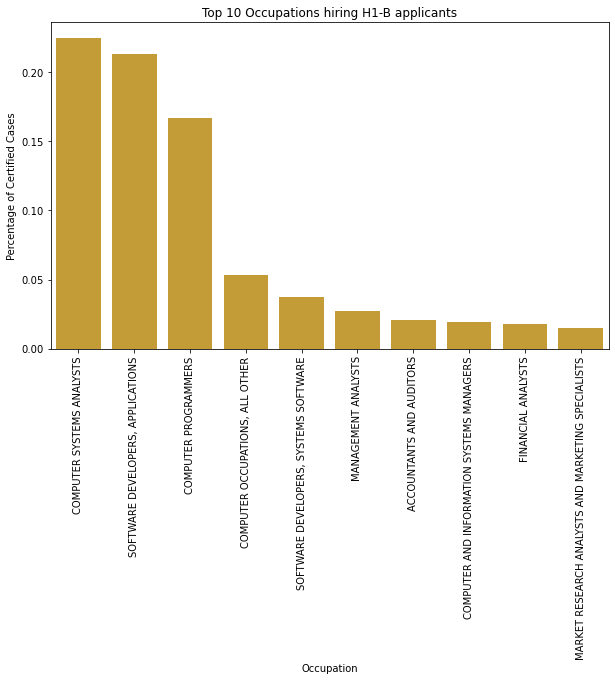

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='SOC_NAME', y='PERCENT', data=visa_soc, color='goldenrod')
plt.title('Top 10 Occupations hiring H1-B applicants')
plt.xlabel('Occupation')
plt.ylabel('Percentage of Certified Cases')
plt.xticks(rotation=90)
plt.show()

The above graph shows that if someone wants to improve their visa certifying probability they should apply for more software developers oriented roles.

# 5) Checking top 10 states and cities based on h1b visa counts

    EMPLOYER_STATE
CA       16.059346
TX       15.369907
NJ       14.181943
NY        7.352801
IL        6.299767
PA        4.291277
MI        3.778362
MD        3.722971
VA        3.396140
NC        3.282696
------------------------------------------------------------------
NEW YORK         60990
HOUSTON          26958
SAN FRANCISCO    25394
ATLANTA          20479
CHICAGO          18818
SAN JOSE         17638
SUNNYVALE        14335
IRVING           12702
CHARLOTTE        12497
MOUNTAIN VIEW    12245
Name: WORKSITE_CITY, dtype: int64


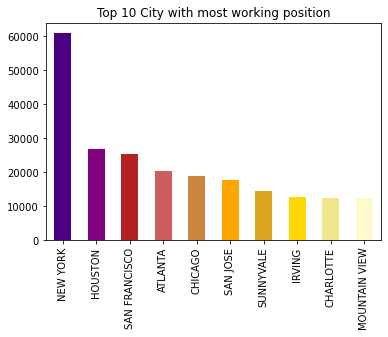

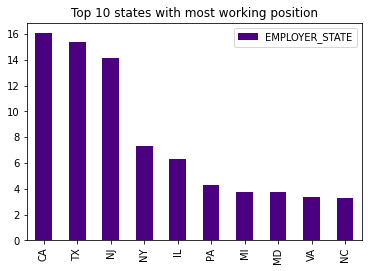

In [16]:
five=pd.DataFrame(df.EMPLOYER_STATE.value_counts(normalize = True)).head(10) * 100
five1=df.WORKSITE_CITY.value_counts().head(10)
df.WORKSITE_CITY.value_counts().head(10).plot(kind='bar', title='Top 10 City with most working position', color=colors)
(pd.DataFrame(df.EMPLOYER_STATE.value_counts(normalize = True)).head(10) * 100).plot(kind='bar', title='Top 10 states with most working position', color=colors)
print(five)
print('------------------------------------------------------------------')
print(five1)

Its not surprising to see that california and newyork are top working states and cities for h1-b applicantions as they are technical-hubs of united states.

# 6) Top 10 job positions and companies hiring filing H1-B visa applications 

In [17]:
print('Summary of EMPLOYER_NAME column: ',df.EMPLOYER_NAME.describe())
print('Summary of SOC_NAME column: : ',df.SOC_NAME.describe())

Summary of EMPLOYER_NAME column:  count             1014616
unique              93696
top       INFOSYS LIMITED
freq                52987
Name: EMPLOYER_NAME, dtype: object
Summary of SOC_NAME column: :  count                               1014623
unique                                 1086
top       SOFTWARE DEVELOPERS, APPLICATIONS
freq                                 214740
Name: SOC_NAME, dtype: object


In [18]:
# #Plotting top 10 Job position and companies for Visa petition
# plt.figure(figsize=(10,8))
# plt.subplot(1, 2, 1)
# # df.SOC_NAME.value_counts().head(10).plot(kind='bar',title='Top 10 Job Position', color=colors)
# # plt.subplot(1, 2, 2)
# df.EMPLOYER_NAME.value_counts().head(10).plot(kind='bar',title='Top 10 Job Companies', color=colors)
# plt.tight_layout()
# plt.show()

# 7) Analyzing outliers on case_status and prevailing wage

In [19]:
#Analysing mean and median to understand outliers
print('Median: ', np.nanmedian(df.PREVAILING_WAGE))
print('Mean: ', np.nanmean(df.PREVAILING_WAGE))

df.PREVAILING_WAGE.describe()

Median:  66518.0
Mean:  69538.82426156345


count    1.014576e+06
mean     6.953882e+04
std      3.079981e+04
min      0.000000e+00
25%      5.568200e+04
50%      6.651800e+04
75%      8.301300e+04
max      9.110400e+06
Name: PREVAILING_WAGE, dtype: float64

In PREVAILING_WAGE column, minimum salary is 0.0 where, maximum is 6000 million. Median value is 65000.0 but mean is 142891. It can be seen that there is extrem difference between the minimum and maximum value. So, it is clear that multiple outliers exist in the dataset. From the box plot of 500 rows of data, it shows the existence of outlier. Interestingly, in case_status vs wage plot, more outlier is identified in denial cases.

<Figure size 720x576 with 0 Axes>

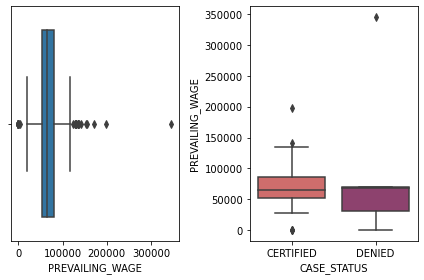

In [20]:
#Analyzing outliers in PREVAILING_WAGE and CASE_STATUS
plt.figure(figsize=(10,8))
fig,ax = plt.subplots(1,2)
sns.boxplot(x=dp.PREVAILING_WAGE.head(500), ax=ax[0])
sns.boxplot(x="CASE_STATUS", y="PREVAILING_WAGE", data=df.head(100), palette="flare", ax=ax[1])
plt.tight_layout()
fig.show()

# 8) Analyzing Data Scientist and software developers Job

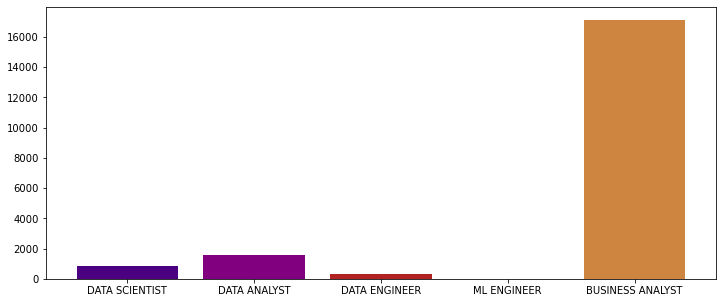

In [21]:
jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'ML ENGINEER', 'BUSINESS ANALYST']
count = []
# Counting the number of applicants related to each job title.
for var in jobs:
    q = dp[dp['JOB_TITLE']==var]['JOB_TITLE'].count()
    count.append(q)
plt.figure(figsize=(12,5))
plt.bar(x=jobs, height=count, color=colors)
plt.show()
print()


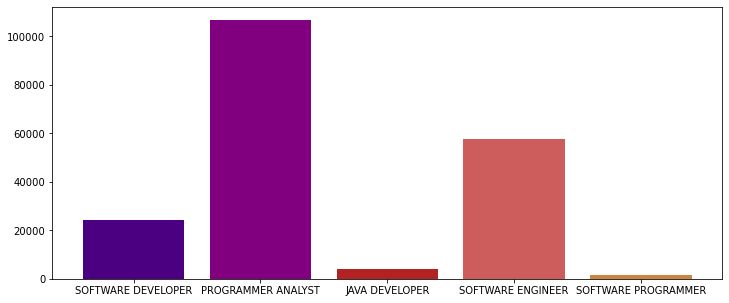

In [22]:
jobs1 = ['SOFTWARE DEVELOPER', 'PROGRAMMER ANALYST', 'JAVA DEVELOPER', 'SOFTWARE ENGINEER', 'SOFTWARE PROGRAMMER']
count1 = []
# Counting the number of applicants related to each job title.
for var in jobs1:
    d = dp[dp['JOB_TITLE']==var]['JOB_TITLE'].count()
    count1.append(d)
plt.figure(figsize=(12,5))
plt.bar(x=jobs1, height=count1, color=colors)
plt.show()
print()


From the above graphs it is observed that if you are a programmer analyst or business analyst your approval probability is higher than other roles.

# 9) Comparing certified and denied applications

<AxesSubplot:title={'center':'Case Status Percentage(Certfied & Denied)'}, ylabel='CASE_STATUS'>

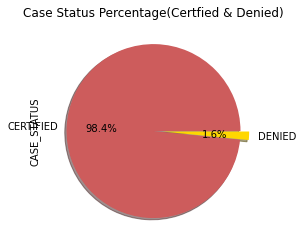

In [23]:
df['CASE_STATUS'].value_counts()[:10].plot(kind='pie', title='Case Status Percentage(Certfied & Denied)',legend=False,autopct='%1.1f%%',explode=(0, 0.1),colors = ['indianred', 'gold'],shadow=True, startangle=0)

We can infer that the percentage of certified applications in our dataset is more than the denied applications.

# 10) Top 10 Employers in United states

<AxesSubplot:>

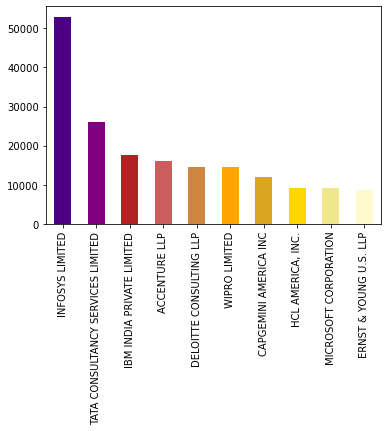

In [24]:
df['EMPLOYER_NAME'].value_counts()[:10].plot(kind='bar',color=colors)

From the above graphs it can be inferred that the combination of top 10 job positions and top 10 companies may increase the probability of getting the h1-b application certified.

# 11) Analyzing wage trend over the years

In [25]:
dp['YEAR'] = pd.DatetimeIndex(dp['CASE_SUBMITTED']).year
df['YEAR'] = pd.DatetimeIndex(df['CASE_SUBMITTED']).year

In [26]:
dp['YEAR'].min()

2010

In [27]:
dp['YEAR'].max()

2016

(0.0, 200000.0)

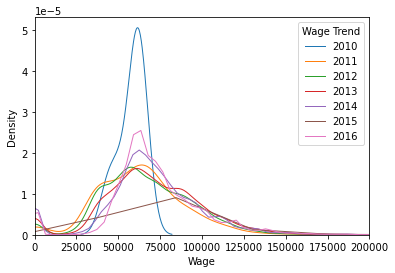

In [28]:
#Trend of PREVAILING_WAGE from 2010-2016
years=[2010,2011,2012,2013,2014,2015,2016]
for year in years:
    subset = dp[dp['YEAR']==year]
    sns.distplot(subset['PREVAILING_WAGE'], hist=False, kde=True, kde_kws={'linewidth':1}, label=year)
plt.legend(prop={'size':10},title='Wage Trend')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.xlim(0,200000)

In the above density plot, it shows the trend of wages over the years. All the patterns are right skewed and indicate a number of outliers.

In [29]:
df.WORKSITE_CITY.describe()

count      1014600
unique        9905
top       NEW YORK
freq         60990
Name: WORKSITE_CITY, dtype: object

# 12) Analyzing companies trends of H1-B applications over the years 

In [30]:
topEmp = list(dp['EMPLOYER_NAME'][dp['YEAR'] >= 2016].groupby(dp['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byEmpYear = dp[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][dp['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([dp['EMPLOYER_NAME'],dp['YEAR']])

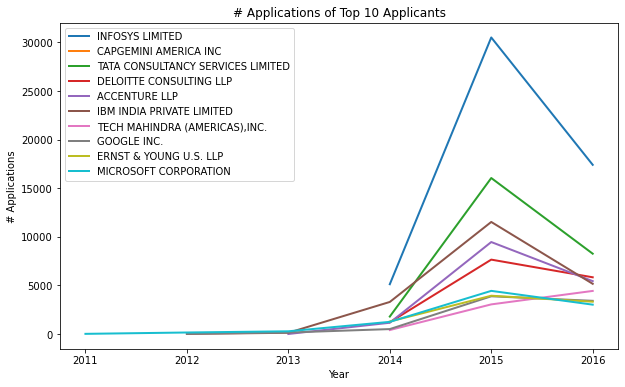

In [31]:
fig = plt.figure(figsize=(10,6))
for company in topEmp:
    tmp = byEmpYear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2)
plt.xlabel("Year")
plt.ylabel("# Applications")
plt.legend()
plt.title('# Applications of Top 10 Applicants')
plt.show()

It is observed that over the years companies do hire H1-B applicants incresingly but after 2015 the number of applications started decreasing

# 13) Analyzing avg salary of companies over the years

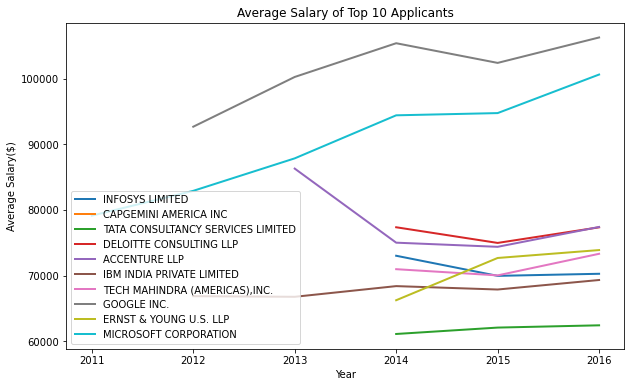

In [32]:
fig = plt.figure(figsize=(10,6))
for company in topEmp:
    tmp = byEmpYear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Salary($)")
plt.legend()
plt.title("Average Salary of Top 10 Applicants")
plt.show()

We can infer from the average salary graph that the google is the highest salary payer from 2011-2016 and also tata consultancy being not paying much but have followed an increasing trend in their wages.

# 14) Most popular jobs with their avg salary and number of applications

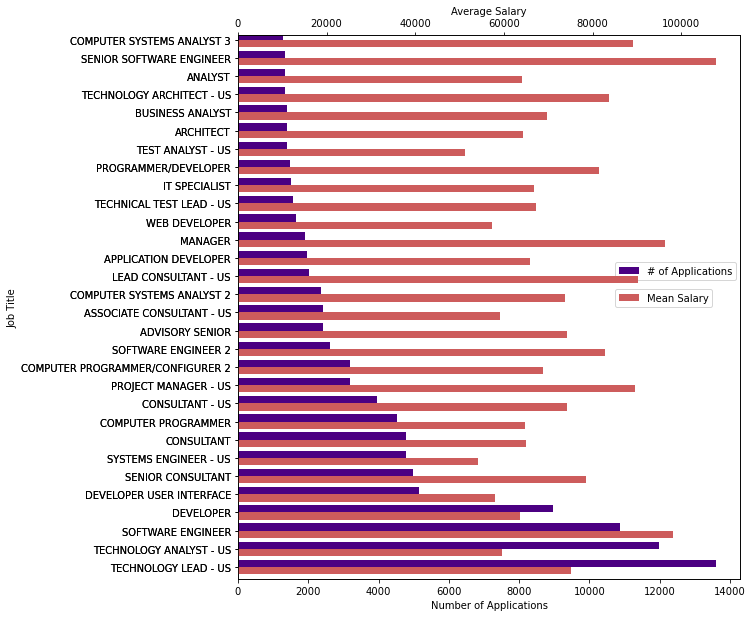

In [33]:
newdf=dp.copy()
PopJobs = newdf[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']][newdf['EMPLOYER_NAME'].isin(topEmp)].groupby(['JOB_TITLE'])
topJobs = list(PopJobs.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
newdf = PopJobs.count().loc[topJobs].assign(MEAN_WAGE=PopJobs.mean().loc[topJobs])
fig = plt.figure(figsize=(9,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
newdf.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='indigo', width=0.4, position=0, label='# of Applications')
newdf.MEAN_WAGE.plot(kind='barh', ax=ax2, color='indianred', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('Number of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Average Salary')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

In [34]:
df

,Unnamed: 0,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_STATE,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,VISA_CLASS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_POSTAL_CODE,WORKSITE_STATE,YEAR
1,1,NaN,NaN,NaN,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,905 ASP AVE,NORMAN,...,H-1B,85000.00 -,NaN,Year,N,NORMAN,CLEVELAND,73019,OK,2014
3,3,SCHAUMBURG,ELDON KAKUDA,IL,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,9510 N. HOUSTON ROSSLYN ROAD,HOUSTON,...,H-1B,66000 - 70000,NaN,Year,N,HOUSTON,HARRIS,77088,TX,2015
4,4,WASHINGTON,JAMES ALEXANDER,DC,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,8250 JONES BRANCH DRIVE,MCLEAN,...,H-1B,97000 - 143300,NaN,Year,N,MCLEAN,FAIRFAX,22102,VA,2014
6,6,AUSTIN,JACQUELYN MARONEY,TX,I-200-09212-834534,CERTIFIED,2014-10-14,2014-10-20,3401 HILLVIEW AVE,PALO ALTO,...,H-1B,155000.00 -,NaN,Year,N,PALO ALTO,SANTA CLARA,94304,CA,2014
7,7,WASHINGTON,JAMES ALEXANDER,DC,I-200-09232-212049,CERTIFIED,2014-12-17,2014-12-23,8250 JONES BRANCH DRIVE,MCLEAN,...,H-1B,64100 - 127000,NaN,Year,N,MCLEAN,FAIRFAX,22102,VA,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,NaN,",",NaN,I-200-16253-389632,CERTIFIED,2016-09-09,2016-09-15,1305 CHERRINGTON PARKWAY,MOON TOWNSHIP,...,H-1B,33.53,0,Hour,N,PHILADELPHIA,PHILADELPHIA,19103,PA,2016
1048571,1048571,WEST BLOOMFIELD,"SHERMAN, MICHAEL",MI,I-200-16253-408673,CERTIFIED,2016-09-09,2016-09-15,ONE LA-Z-BOY DRIVE,MONROE,...,H-1B,"113,500.00",0,Year,N,MONROE,MONROE,48162,MI,2016
1048572,1048572,WASHINGTON,"MUHLENKAMP, PRISCILLA",DC,I-200-16253-507837,CERTIFIED,2016-09-09,2016-09-15,9201 CORPORATE BOULEVARD,ROCKVILLE,...,H-1B,"63,461.00","94,500.00",Year,N,CHICAGO,COOK,60606,IL,2016
1048573,1048573,RESTON,"GOEL, VIC",VA,I-200-16253-591555,CERTIFIED,2016-09-12,2016-09-16,9201 CORPORATE BOULEVARD,ROCKVILLE,...,H-1B,"73,320.00","87,000.00",Year,N,REDMOND,KING,98052,WA,2016


# DATA CLEANING

In [35]:
#Dropping the columns not required
df1=df.drop(['H1B_DEPENDENT','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_STATE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE','JOB_TITLE','NAICS_CODE','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR','CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_COUNTRY','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE','EMPLOYER_STATE','EMPLOYMENT_END_DATE','EMPLOYMENT_START_DATE','PW_UNIT_OF_PAY','PW_WAGE_SOURCE','PW_WAGE_SOURCE_OTHER','PW_WAGE_SOURCE_YEAR','SOC_CODE','TOTAL_WORKERS','VISA_CLASS','WAGE_RATE_OF_PAY_FROM' ,'WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR','WORKSITE_COUNTY','WORKSITE_POSTAL_CODE','WORKSITE_STATE'],axis=1)

In [36]:
#Checking for nan
count_nan = len(df1) - df1.count() # checking number of nan values
print(count_nan)

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             11
FULL_TIME_POSITION    415296
H-1B_DEPENDENT         19921
NAIC_CODE                  5
PREVAILING_WAGE           51
SOC_NAME                   4
WORKSITE_CITY             27
YEAR                       0
dtype: int64


In [37]:
#Dropping the nan value
df1.dropna(subset=['CASE_STATUS','WORKSITE_CITY','FULL_TIME_POSITION','EMPLOYER_NAME','SOC_NAME','H-1B_DEPENDENT','NAIC_CODE','SOC_NAME','PREVAILING_WAGE'], inplace=True) ## dropping null values

In [38]:
#Checking whether the null value got dropped
count_nan = len(df1) - df1.count() 
print(count_nan)

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
FULL_TIME_POSITION    0
H-1B_DEPENDENT        0
NAIC_CODE             0
PREVAILING_WAGE       0
SOC_NAME              0
WORKSITE_CITY         0
YEAR                  0
dtype: int64


In [39]:
 case_status = {
   'CASE_STATUS': {
       r'CERTIFIED-WITHDRAWN': 'CERTIFIED'}
}
df1.replace(case_status, regex=True, inplace=True)

# drop rows with 'WITHDRAWN' value 
indexNames = df1[df1['CASE_STATUS']=='WITHDRAWN'].index
df1.drop(indexNames , inplace=True)

In [40]:
df1.CASE_STATUS.value_counts()

CERTIFIED    577434
DENIED         9796
Name: CASE_STATUS, dtype: int64

In [41]:
#Down sampling
class_certified, class_denied = df1.CASE_STATUS.value_counts()
#Divide by class
df1_samp = df1[df1.CASE_STATUS=='CERTIFIED']
df1_s_d = df1[df1.CASE_STATUS=='DENIED']
seed=7
df1_samp_under =df1_samp.sample(class_denied,random_state=seed)
df1_down = pd.concat([df1_samp_under, df1_s_d], axis=0)
print('Random under-sampling:')
print(df1.CASE_STATUS.value_counts())

Random under-sampling:
CERTIFIED    577434
DENIED         9796
Name: CASE_STATUS, dtype: int64


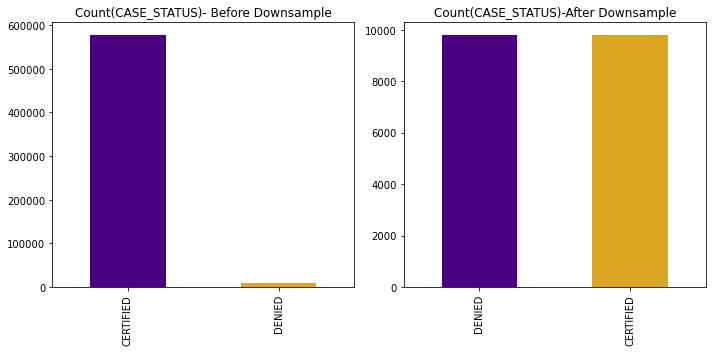

In [42]:
# Graph before before downsampling
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
df1['CASE_STATUS'].value_counts().plot(kind='bar', title='Count(CASE_STATUS)- Before Downsample', color=['indigo','goldenrod']);
plt.subplot(1, 2, 2)
# Graph after downsampling
df1_down.CASE_STATUS.value_counts().plot(kind='bar', title='Count(CASE_STATUS)-After Downsample',color=['indigo','goldenrod']);
plt.tight_layout()
plt.show()

In [43]:
# Detecting outlier
q1=df1_down["PREVAILING_WAGE"].quantile(0.25)
q3=df1_down["PREVAILING_WAGE"].quantile(0.75)
IQR=q3-q1
outliers=((df1_down["PREVAILING_WAGE"]<(q1 - 1.5*IQR)) | (df1_down["PREVAILING_WAGE"]>(q3 + 1.5*IQR))).sum()
print('No of outlier:', outliers)

No of outlier: 2936


In [44]:
#Removing the outliers
df1_down = df1_down.drop(df1_down[df1_down.PREVAILING_WAGE < (q1 - 1.5*IQR)].index)
df1_down = df1_down.drop(df1_down[df1_down.PREVAILING_WAGE > (q1 + 1.5*IQR)].index)

<Figure size 720x576 with 0 Axes>

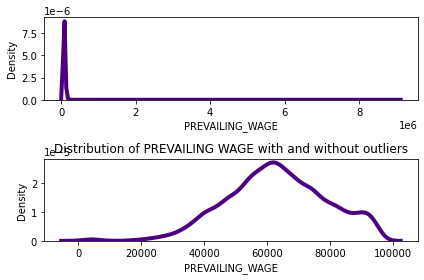

In [45]:
#Plot density before and after removing the outliers from PREVAILING_WAGE
plt.figure(figsize=(10,8))
fig,ax=plt.subplots(2,1)
plt.title('Distribution of PREVAILING WAGE with and without outliers')
sns.distplot(df['PREVAILING_WAGE'], hist=False, kde=True, color='indigo', kde_kws={'linewidth':4}, ax=ax[0])
sns.distplot(df1_down['PREVAILING_WAGE'], hist=False, kde=True, color='indigo', kde_kws={'linewidth':4}, ax=ax[1])
plt.tight_layout()
fig.show()

In [46]:
#Cleaning the EMPLOYER_NAME column using regular expression
df1_down.EMPLOYER_NAME = df1_down.EMPLOYER_NAME.str.lower()
emp_name = {
   'EMPLOYER_NAME': {
      r"[.\-,);\"'(+/]|(&QUOT;)":'', 
      r'ltd':'limited',
      r'(&amp;)|&':'and',r'(.gates corporation.$)':'gates corporation',
      r'corp$':'corporation',
      r'^europeanamerican':'european american',
      r'(.euromarket designs inc.$)':'euro market designs inc',
      r'(.eurofins lancaster laboratories$)':'eurofins lancaster laboratories inc',
      r'^eurocolletion|^eurocollection':'euro collection',
      r'^technosoft':'techno soft',
      r'^healthcare':'health care',
      r'^healthplan':'health plan',
      r'warner university inc':'warner university',
      r'grouppc$':'group pc',
      r'americasinc$':'americas inc'}
}

df1_down.replace(emp_name, regex=True, inplace=True)

In [47]:
#Remove rows of the employers with less than 4 application  
df_dict = df1_down.EMPLOYER_NAME.value_counts().to_dict()
emp_list = [k for k,v in df_dict.items() if v<=4]
len(emp_list)
df1_down = df1_down[~df1_down.EMPLOYER_NAME.isin(emp_list)]

In [48]:
# replace 'CERTIFIED' and 'DENIED' label of 'CASE_STATUS' respectively with '1' and '0'
df1_down['CASE_STATUS'] = df1_down['CASE_STATUS'].replace({'CERTIFIED': 1,'DENIED':0})
df1_down.CASE_STATUS.astype(int)

525572    1
148666    1
594637    1
4307      1
453637    1
         ..
605708    0
605721    0
605725    0
615054    0
618061    0
Name: CASE_STATUS, Length: 5971, dtype: int64

In [49]:
df1_downtest = df1_down.copy()

In [50]:
#replace into 'low', 'medium' and 'high'
df1_downtest['PREVAILING_WAGE_Group'] = pd.cut(df1_downtest['PREVAILING_WAGE'],3)

In [51]:
#df1_downtest['PREVAILING_WAGE_Group']
bins=[-9110.4, 3036800.0, 6073600.0, 9110400.0]
labels=['Low', 'Medium', 'High']
df1_downtest['PREVAILING_WAGE_Group'] = pd.cut(df1_downtest['PREVAILING_WAGE'], bins, labels=labels)
df1_downtest['PREVAILING_WAGE_Group']

525572    Low
148666    Low
594637    Low
4307      Low
453637    Low
         ... 
605708    Low
605721    Low
605725    Low
615054    Low
618061    Low
Name: PREVAILING_WAGE_Group, Length: 5971, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [52]:
df1_down['FULL_TIME_POSITION']=df1_down['FULL_TIME_POSITION'].replace({'Y': 1, 'N': 0})
df1_down.FULL_TIME_POSITION.astype(int)

525572    1
148666    1
594637    1
4307      1
453637    1
         ..
605708    1
605721    1
605725    1
615054    1
618061    1
Name: FULL_TIME_POSITION, Length: 5971, dtype: int64

In [53]:
categorical_col=['EMPLOYER_NAME','SOC_NAME','WORKSITE_CITY','YEAR','PREVAILING_WAGE']
dummy_df = pd.get_dummies(df1_down[categorical_col])
df1_down =pd.concat([df1_down,dummy_df],axis=1)
df1_down =df1_down.drop(categorical_col,axis=1)

In [54]:
 label_encoder = preprocessing.LabelEncoder()

In [55]:
df1_down['FULL_TIME_POSITION']= label_encoder.fit_transform(df1_down['FULL_TIME_POSITION'])
#df1_down['NAIC_CODE']= label_encoder.fit_transform(df1_down['NAIC_CODE'])
df1_down['H-1B_DEPENDENT']= label_encoder.fit_transform(df1_down['H-1B_DEPENDENT'])

# MODEL

In [56]:
X = df1_down.drop('CASE_STATUS', axis = 1)
y = df1_down['CASE_STATUS']

In [57]:
X.shape

(5971, 1414)

In [58]:
y.shape

(5971,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 142)

In [60]:
# DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train,y_train)
y_pred = DecisionTree.predict(X_test)
DTAcc = accuracy_score(y_test,y_pred)
DTAcc

0.7598326359832636

In [61]:
confusion_matrix(y_test, y_pred)

array([[275, 155],
       [132, 633]])

In [62]:
DTPre=precision_score(y_test, y_pred)
DTPRe=metrics.recall_score(y_test, y_pred)  
DTPF1=metrics.f1_score(y_test, y_pred)
predictionDTP=DecisionTree.predict(X_test)

In [63]:
# Gaussian Naive Bayes
GNB = GaussianNB()
GNB = GNB.fit(X_train, y_train)
y_pred1 = GNB.predict(X_test)
GNBAcc = accuracy_score(y_test,y_pred1)
GNBAcc

0.6401673640167364

In [64]:
confusion_matrix(y_test, y_pred1)

array([[  0, 430],
       [  0, 765]])

In [65]:
GNBPre=precision_score(y_test, y_pred1)
GNBRe=metrics.recall_score(y_test, y_pred1)  
GNBF1=metrics.f1_score(y_test, y_pred1)
predictionGNB=GNB.predict(X_test)

In [66]:
# KNN
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(X_train,y_train)
y_pred2 = KNN.predict(X_test)
KNNAcc = accuracy_score(y_test,y_pred2)
KNNAcc

0.6393305439330544

In [67]:
confusion_matrix(y_test, y_pred2)

array([[180, 250],
       [181, 584]])

In [68]:
KNNPre=precision_score(y_test, y_pred2)
KNNRe=metrics.recall_score(y_test, y_pred2)  
KNNF1=metrics.f1_score(y_test, y_pred2)
predictionKNN=KNN.predict(X_test)

In [69]:
# Random Forest
RFC = RandomForestClassifier(n_estimators = 100) 
RFC=RFC.fit(X_train, y_train)
y_pred3 = RFC.predict(X_test)
RFCAcc=accuracy_score(y_test, y_pred3)
RFCAcc

0.7841004184100419

In [70]:
confusion_matrix(y_test, y_pred3)

array([[263, 167],
       [ 91, 674]])

In [71]:
RFCPre=precision_score(y_test, y_pred3)
RFCRe=metrics.recall_score(y_test, y_pred3)  
RFCF1=metrics.f1_score(y_test, y_pred3)
predictionRFC=RFC.predict(X_test)

In [72]:
# Logistic Regression
LR = LogisticRegression() 
LR=LR.fit(X_train, y_train)
y_pred4 = LR.predict(X_test)
LRAcc=accuracy_score(y_test, y_pred3)
LRAcc

0.7841004184100419

In [73]:
confusion_matrix(y_test, y_pred4)

array([[  0, 430],
       [  0, 765]])

In [74]:
LRPre=precision_score(y_test, y_pred4)
LRRe=metrics.recall_score(y_test, y_pred4)  
LRF1=metrics.f1_score(y_test, y_pred4)

In [75]:
predictionLR=LR.predict(X_test)

In [76]:
model1 = ['DecisionTreeClassifier', 'Gaussian Naive bayes', 'K-Nearest Neighbours', 'Random Forest','Logistic Regression']
score1 = [DTAcc, GNBAcc, KNNAcc, RFCAcc, LRAcc]
compare1 = pd.DataFrame({'Model': model1, 'Accuracy': score1}, index=[1, 2, 3, 4, 5,])
compare1

,Model,Accuracy
1,DecisionTreeClassifier,0.759833
2,Gaussian Naive bayes,0.640167
3,K-Nearest Neighbours,0.639331
4,Random Forest,0.784100
5,Logistic Regression,0.784100


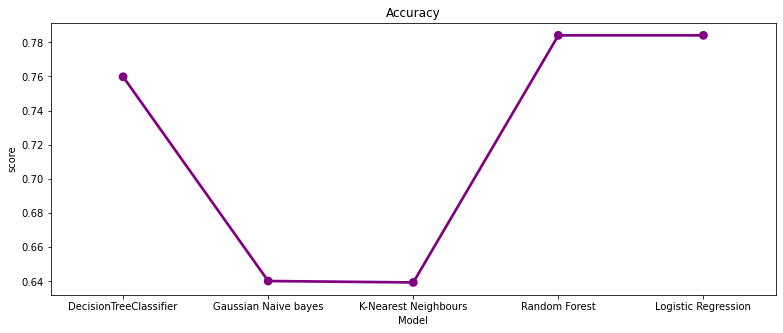

In [77]:
plt.figure(figsize=(13,5))
sns.pointplot(x='Model', y='Accuracy', data=compare1, color='purple')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('score')
plt.show()

# Performance metrics

In [78]:
model1 = ['DecisionTreeClassifier', 'Gaussian Naive bayes', 'K-Nearest Neighbours', 'Random Forest', 'Logistic Regression']
pscore = [DTPre, GNBPre, KNNPre, RFCPre, LRPre]
rscore = [DTPRe, GNBRe, KNNRe, RFCRe, LRRe]
fscore = [DTPF1, GNBF1, KNNF1, RFCF1, LRF1]
compare2 = pd.DataFrame({'Model': model1, 'Precision': pscore, 'Recall': rscore, 'F1-Score': fscore}, index=[1, 2, 3, 4, 5,])
compare2

,Model,Precision,Recall,F1-Score
1,DecisionTreeClassifier,0.803299,0.827451,0.815196
2,Gaussian Naive bayes,0.640167,1.000000,0.780612
3,K-Nearest Neighbours,0.700240,0.763399,0.730457
4,Random Forest,0.801427,0.881046,0.839352
5,Logistic Regression,0.640167,1.000000,0.780612


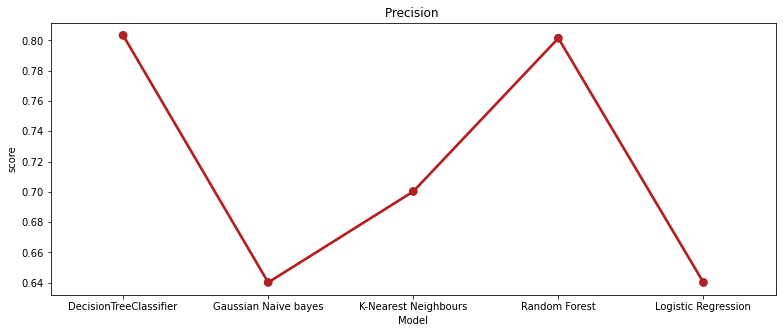

In [79]:
plt.figure(figsize=(13,5))
sns.pointplot(x='Model', y='Precision', data=compare2, color='firebrick')
plt.title('Precision ')
plt.xlabel('Model')
plt.ylabel('score')
plt.show()

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(x_test,y_test,model):
    preds = model. predict_proba(x_test) [:,1]
    #Compute Receiver operating characteristic (ROC) curve
    fpr, tpr, threshold = roc_curve(y_test, preds)
    #ROC Score
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color='dodgerblue')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--',color='firebrick')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [81]:
from imblearn.metrics import classification_report_imbalanced
def metrics_cal(x_test,y_test,prediction,model):    
    print("Model Accuracy:",metrics.accuracy_score(y_test, prediction))
    probs = model.predict_proba(x_test)
    roc_auc = metrics.roc_auc_score(y_test, probs[:,1]) 
    print("ROC:",roc_auc)
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return print (classification_report_imbalanced(y_test, y_pred))

# Metrics Calculation for Random Forest

In [82]:
#Metrics Calculation
metrics_cal(X_test,y_test,predictionRFC,RFC)

Model Accuracy: 0.7841004184100419
ROC: 0.8452226782185741
Confusion Matrix:
[[263 167]
 [ 91 674]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.61      0.88      0.67      0.73      0.52       430
          1       0.80      0.88      0.61      0.84      0.73      0.55       765

avg / total       0.78      0.78      0.71      0.78      0.73      0.54      1195



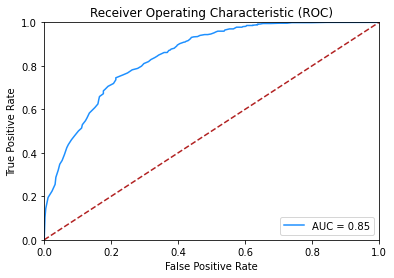

In [83]:
#ROC Curve 
roc_curve_graph(X_test,y_test,RFC)

# Metrics Calculation for Decision Tree

Model Accuracy: 0.7598326359832636
ROC: 0.7334929320565435
Confusion Matrix:
[[275 155]
 [132 633]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.68      0.64      0.83      0.66      0.73      0.52       430
          1       0.80      0.83      0.64      0.82      0.73      0.54       765

avg / total       0.76      0.76      0.71      0.76      0.73      0.53      1195



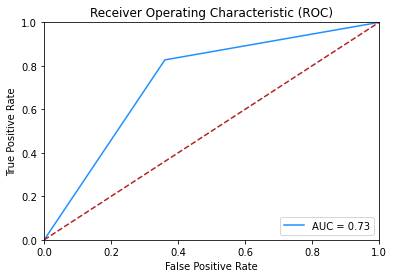

In [84]:
#Metrics Calculation
metrics_cal(X_test,y_test,predictionDTP, DecisionTree)
roc_curve_graph(X_test,y_test, DecisionTree)

# Metrics Calculation for KNN

Model Accuracy: 0.6393305439330544
ROC: 0.6231752545979632
Confusion Matrix:
[[180 250]
 [181 584]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.42      0.76      0.46      0.57      0.31       430
          1       0.70      0.76      0.42      0.73      0.57      0.33       765

avg / total       0.63      0.64      0.54      0.63      0.57      0.32      1195



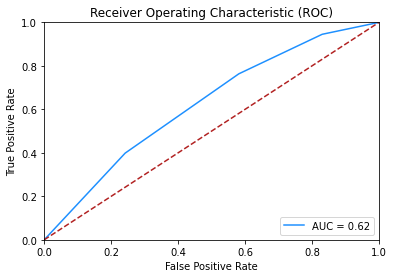

In [85]:
#Metrics Calculation
metrics_cal(X_test,y_test,predictionKNN, KNN)
roc_curve_graph(X_test,y_test, KNN)

# Metrics Calculation for Guassian Naive Bayes

Model Accuracy: 0.6401673640167364
ROC: 0.5610761513907889
Confusion Matrix:
[[  0 430]
 [  0 765]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00       430
          1       0.64      1.00      0.00      0.78      0.00      0.00       765

avg / total       0.41      0.64      0.36      0.50      0.00      0.00      1195



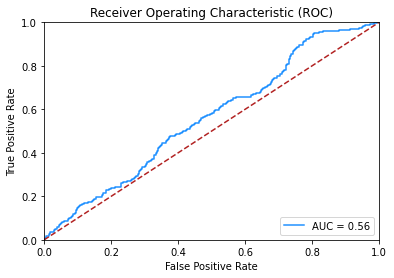

In [86]:
#Metrics Calculation
metrics_cal(X_test,y_test,predictionGNB, GNB)
roc_curve_graph(X_test,y_test, GNB)

# Metrics Calculation for Logistic Regression

Model Accuracy: 0.6401673640167364
ROC: 0.485484116127071
Confusion Matrix:
[[  0 430]
 [  0 765]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00       430
          1       0.64      1.00      0.00      0.78      0.00      0.00       765

avg / total       0.41      0.64      0.36      0.50      0.00      0.00      1195



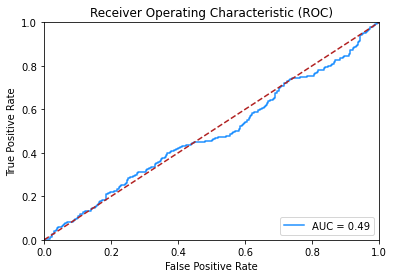

In [87]:
#Metrics Calculation
metrics_cal(X_test,y_test,predictionLR, LR)
roc_curve_graph(X_test,y_test, LR)

# Software Developer Job: Analysis and Prediction

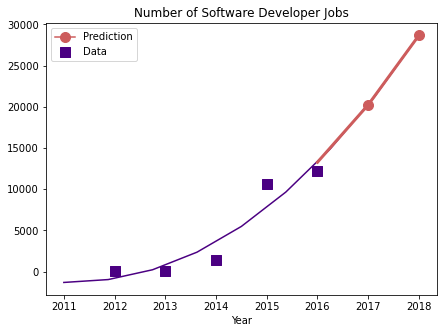

In [88]:
import scipy
from scipy import optimize
dsj = dp[['JOB_TITLE','YEAR']][dp['JOB_TITLE'] == "SOFTWARE DEVELOPER"].groupby('YEAR').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2011,b)+c
popt, pcov = optimize.curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2016,2018,3)
X3 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='indigo', marker='s', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='indigo', label='')
plt.plot(X2, func(X2,*popt), color='indianred', linewidth=3, marker='o', markersize=1, label='')
plt.plot(X3, func(X3,*popt), color='indianred', marker='o', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Software Developer Jobs')
plt.xlabel('Year')
plt.show()

# Conclusion

To build a model Data pre-processing is very important stage as your model effeciency depends alot on on how you process your data.

1)According to our analysis the best algorithm which fits our model is Random forest because the accuracy of this model is higher compared to other models,also the best curve we are getting is in random forest.The precision,recall and F-1 score are satisfactory for this model so we would go with Random Forest for the case_status prediction.

2)Also we can say that the number of software developer jobs will increase from year 2016-2017 and further will rise again in year 2017-2018.

3)One should target comapanies such as INFOSYS LIMITED, TATA CONSULTANCY SERVICES LIMITED, CAPGEMINI AMERICA INC, IBM INDIA PRIVATE LIMITED.These are huge multi-national companies and they have good immigration team that can take care of your visa and status.

4)For a MS student pursuing technical courses in United States of America should apply in giant techs like infosys,tata(Top ten Companies) for roles like software developers(Top 10 job roles) as this combination will have high chances of getting their visa approved.

# Contribution

15/11/2021 : Methodology	Kulbir Singh,Ishita Gandhi
01/12/2021 : Data Exploration Kulbir, Ishita
05/12/2021 : Data Cleaning	Kulbir, Ishita
07/12/2021 : Models	Kulbir, Ishita
08/12/2021 : Conclusion	Kulbir, Ishita
